## Heisenberg Model

The Heisenberg Hamiltonian is given by

${{\hat {H}_H}=-{\frac {1}{2}}\sum _{j=1}^{N}(J_{x}\sigma _{j}^{x}\sigma _{j+1}^{x}+J_{y}\sigma _{j}^{y}\sigma _{j+1}^{y}+J_{z}\sigma _{j}^{z}\sigma _{j+1}^{z}+h\sigma _{j}^{z})}$

where $J_{a}, a \in {x,y,z}$ are real-valued constants. 


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [16]:
### XYZ Heisenberg model

solver = "me"   # use the ode solver
#solver = "mc"   # use the monte-carlo solver

N = 5            # number of spins

# array of spin energy splittings and coupling strengths. here we use
# uniform parameters, but in general we don't have too
h  = 1.0 * 2 * np.pi * np.ones(N) 
Jz = 0.1 * 2 * np.pi * np.ones(N)
Jx = 0.15 * 2 * np.pi * np.ones(N)
Jy = 0.2 * 2 * np.pi * np.ones(N)

In [17]:
def hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver):
    
    id2 = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    
    sx_list = []
    sy_list = []
    sz_list = []
    
    for n in range(N):
        operator_list = []
        for m in range(N):
            operator_list.append(id2)
        
        operator_list[n] = sx
        sx_list.append(tensor(operator_list))
        
        operator_list[n] = sy
        sy_list.append(tensor(operator_list))
        
        operator_list[n] = sz
        sz_list.append(tensor(operator_list))
    
    # Constructing the Hamiltonian
    
    H = 0
    
    for n in range(N):
        H += -0.5*h[n]*sz_list[n]
        
    for n in range(N-1):
        H += -0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += -0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += -0.5 * Jz[n] * sz_list[n] * sz_list[n+1]
    
    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])
    
    if solver == "me":
        result = mesolve(H, psi0, tlist, c_op_list, sz_list)
    elif solver == "mc":
        ntraj = 250 
        result = mcsolve(H, psi0, tlist, c_op_list, sz_list, ntraj)

    return result.expect

In [14]:

# dephasing rate
gamma = 0.05 * np.ones(N)

# intial state, first spin in state |1>, the rest in state |0>
psi_list = []
psi_list.append(basis(2,1))
for n in range(N-1):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 50, 200)

sz_expt = hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver)


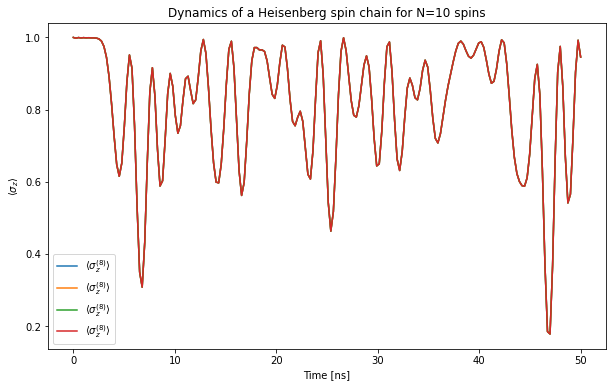

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

for i in range(4):
    ax.plot(tlist, np.real(sz_expt[n]), label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)

ax.legend(loc=0)
ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain for N=10 spins');

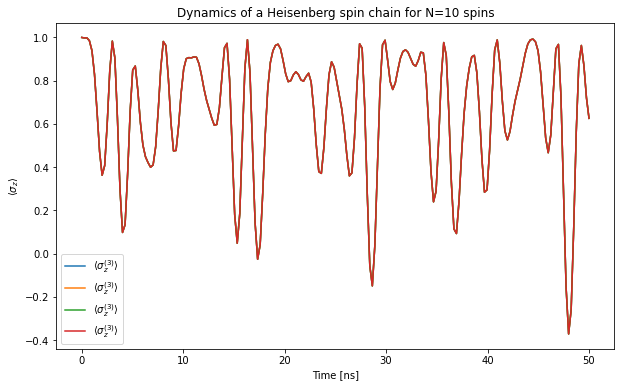

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

for i in range(4):
    ax.plot(tlist, np.real(sz_expt[n]), label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)

ax.legend(loc=0)
ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain for N=5 spins');

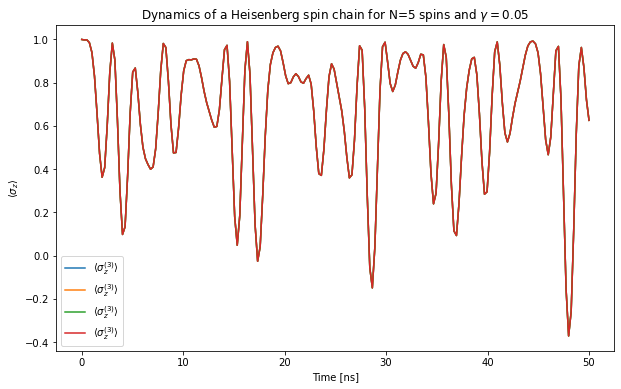

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

for i in range(4):
    ax.plot(tlist, np.real(sz_expt[n]), label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)

ax.legend(loc=0)
ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain for N=5 spins and $\gamma = 0.05$');

In [6]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.6.1
Numpy,1.18.5
SciPy,1.5.0
matplotlib,3.2.2
Cython,0.29.21
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,7.16.1
Python,"3.8.3 (default, Jul 2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]"
OS,nt [win32]
